<a href="https://colab.research.google.com/github/Pimpima/enpc-highdimstats/blob/main/CIRON_PM_TP1_Numpy_and_Maximum_Likelihood_in_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [3]:
np.random.normal()

-1.2383707988418997

In [4]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([10.79025472,  8.83332318, 10.68656906])

In [8]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(8, 1)

In [9]:
np.random.binomial(1, p, size=(5, ))

array([1, 1, 1, 1, 1])

In [11]:
from scipy import linalg

def generate_wishart(n, covariance, k=1):
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """
    p = covariance.shape[0]
    X = np.zeros((k,p,n))
    W = np.zeros((k,p,p))

    for i in range(k) :
      X[i] = np.random.multivariate_normal(np.zeros(p), covariance, n).T
      W[i] = X[i]@(X[i].T)
    return(np.squeeze(W))
    
generate_wishart(5, np.eye(3))

array([[ 5.98731621,  0.41017043,  3.65834617],
       [ 0.41017043,  1.9544169 , -2.01443603],
       [ 3.65834617, -2.01443603,  7.68086157]])

In [12]:
np.random.choice(6) + 1 # roll a die

4

In [13]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([3, 2, 3, 2, 4, 1, 3, 1, 3, 4])

In [14]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([2, 1, 4, 6, 3, 6, 6, 6, 2, 4])

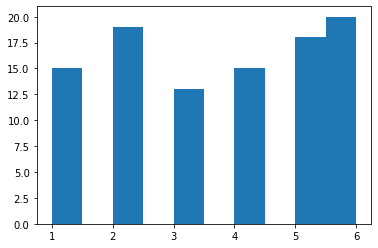

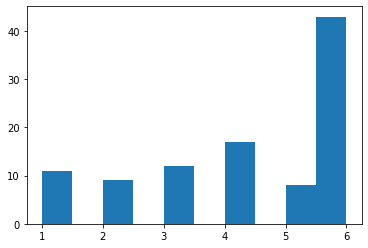

In [15]:
def biased_die_histogram(p, k):
    """
    Draw a biased die with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """

    # histo_distribution = np.zeros(6)

    rolls = 1 + np.random.choice(6, p=p, size=k) 

    # histo_distribution = np.bincount(rolls, minlength=6)

    plt.hist(rolls)
    plt.show()

biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 100)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 100)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [48]:
p, n = 3, 6
A =  np.random.multivariate_normal(np.zeros(p), np.eye(p), n).T


def test_singular_values_eigenvalues():
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    A =  np.random.multivariate_normal(np.zeros(p), np.eye(p), n).T
    U,S,Vt = np.linalg.svd(A, False)
    AtA_U, AtA_S, AtA_Vt = np.linalg.svd(A@A.T, False) #use svd to ensure that eigenvalues are in the same order
    np.testing.assert_allclose(pow(S,2),AtA_S)

test_singular_values_eigenvalues()

def test_pinv():
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    A =  np.random.multivariate_normal(np.zeros(p), np.eye(p), n).T
    U,S,Vt = np.linalg.svd(A, False)
    test_inv = np.linalg.pinv(A)
    #formule with np.where if 0 is in S
    pseudo_inv = Vt.T@np.diagflat(np.where(S>0, pow(S,-1), np.zeros(p)))@U.T
    np.testing.assert_allclose(test_inv, pseudo_inv)

test_pinv()

# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

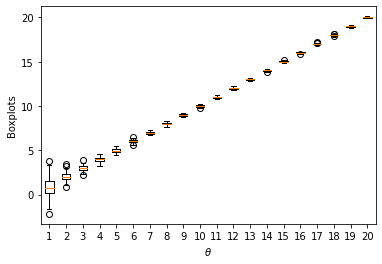

In [63]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """

    random_var = [np.random.normal(theta, 1/theta, size=100) for theta in range(1, 21)]
    plt.xlabel(r'$\theta$')
    plt.ylabel('Boxplots')
    plt.boxplot(random_var)
    plt.show()

plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [64]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

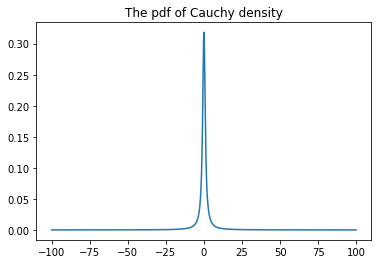

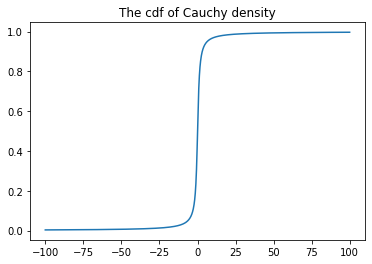

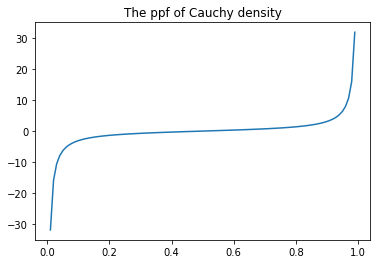

<bound method rv_continuous.ppf of <scipy.stats._continuous_distns.cauchy_gen object at 0x7fd142fce050>>
20%, 50% and 60% quantiles: [-6.31375151 -3.07768354 -1.96261051 -1.37638192 -1.         -0.72654253
 -0.50952545 -0.3249197  -0.15838444  0.          0.15838444  0.3249197
  0.50952545  0.72654253  1.          1.37638192  1.96261051  3.07768354
  6.31375151]


In [73]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf(np.arange(0.05,1,0.05))
print(cauchy.ppf)
print("20%, 50% and 60% quantiles:", quantiles)

1. Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

2. Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

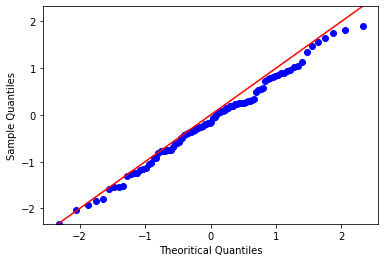

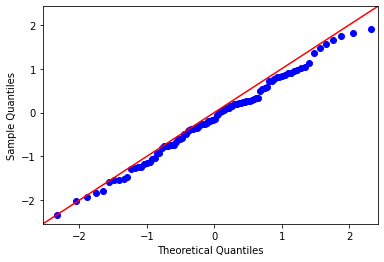

In [86]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """

    percents = 1. * np.arange(len(data)) / (len(data) - 1)

    #sort data
    data_quantiles = np.sort(data[1:-1])
    distrib_quantiles = distribution.ppf(percents[1:-1])

    #plots
    plt.plot(distrib_quantiles, data_quantiles, 'o', color='blue')
    x_min, x_max = np.min(distrib_quantiles), np.max(distrib_quantiles)
    y_min, y_max = np.min(data_quantiles), np.max(data_quantiles)
    min_disp, max_disp = min(x_min,y_min), max(x_max,y_max)
    id_range = np.linspace(min_disp, max_disp, 1000)
    plt.plot(id_range, id_range, color='red')
    plt.ylim(min_disp, max_disp)
    plt.xlabel('Theoritical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

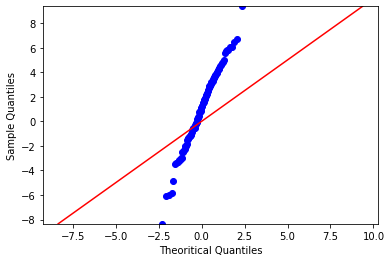

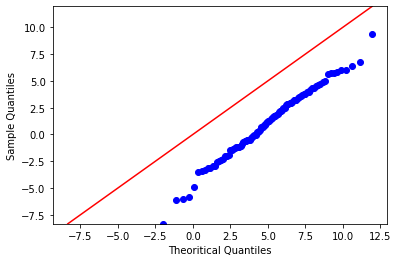

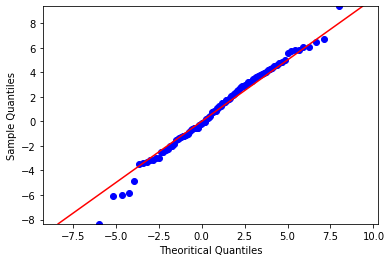

In [91]:
# Answer 1.

data = np.random.normal(1, 3, size=(100, ))

#tests for N(0,1)
normal_01 = scipy.stats.norm(loc=0, scale=1)
qqplot(data, normal_01)

#tests for N(5,3)
normal_53 = scipy.stats.norm(loc=5, scale=3)
qqplot(data, normal_53)

#tests for N(1,3)
normal_13 = scipy.stats.norm(loc=1, scale=3)
qqplot(data, normal_13)

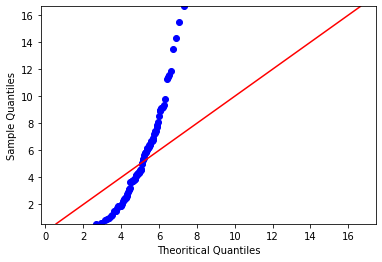

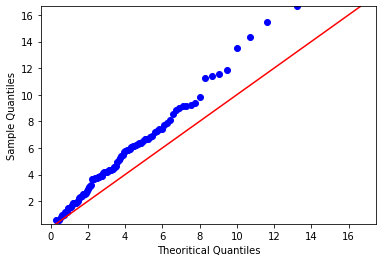

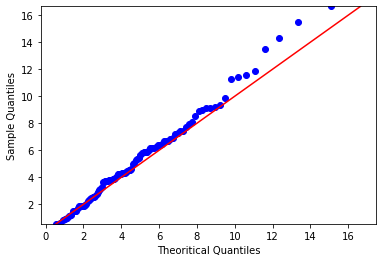

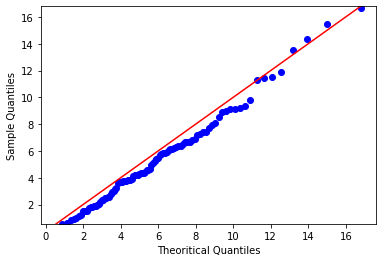

In [93]:
# Answer 2.

data = np.random.chisquare(5, 100)

#tests for N(0,1)
normal_51 = scipy.stats.norm(loc=5, scale=1)
qqplot(data, normal_51)

#tests for X4
chi4 = scipy.stats.chi2(4)
qqplot(data, chi4)

#tests for X5
chi5 = scipy.stats.chi2(5)
qqplot(data, chi5)

#tests for X6
chi6 = scipy.stats.chi2(6)
qqplot(data, chi6)

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [ ]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_star + eps
    """
    raise NotImplementedError

def generate_dataset(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
    """
    raise NotImplementedError

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X.dot(b_true), y)
    
test_nointercept()

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to accout for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
        true coefficients (last one is the intercept)
    """
    raise NotImplementedError

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y)
    
test_nointercept()
test_intercept()

NotImplementedError: 

# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the correct estimate of $\beta$ when there is no noise.

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.


In [ ]:
def compute_least_squares_using_SVD(X, y):
    raise NotImplementedError
    
def compute_least_squares_using_pseudo_inverse(X, y):
    raise NotImplementedError
    
def compute_least_squares_using_method3(X, y):
    raise NotImplementedError

def compute_least_squares_using_scipy(X, y):
    raise NotImplementedError
    
def test_lsqr():
    """Test that all methods yield the correct beta when there is no noise
    """
    raise NotImplementedError
        
def test_same_estimate():
    """ Test that all methods yield the same estimate of beta
    """
    raise NotImplementedError

        
test_lsqr()
test_same_estimate()

NotImplementedError: 

# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

In [ ]:
def error_residual_plot():
    raise NotImplementedError
    
error_residual_plot()


NotImplementedError: 

# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

In [ ]:
# Question 1
raise NotImplementedError
# Question 2
raise NotImplementedError

NotImplementedError: 